# CNN  Assignment

## 理论

### 复习上课内容以及复现课程代码

参考 `tensorflow_and_keras.ipynb`

### 回答以下理论题目?

####  Compared to FNN, what is the biggest advantage of CNN?

参数的数量大大减少

#### Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

In [1]:
# number of params

5 * 5 * 50 + 50

1300

#### What are "local invariant" and "parameter sharing" ?

* local invariant, 卷积核特征提取时与位置无关
* parameter sharing, CNN中卷积核的参数用于所有的输入，而FCN中权重参数只能影响一个输入

####  Why we use batch normalization ?

正则化防止数据进入饱和区，解决了梯度消失的问题。

#### What problem does dropout try to solve ?

防止过拟合

####  Is the following statement correct and why ? "Because pooling layers do not have parameters, they do not affect  the backpropagation(derivatives) calculation"

错误，不同的pooling，反向传播误差的方式不一样。

## 实践

### Image Classification

**In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories.**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

/home/yy/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yy/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yy/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yy/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: P

Load the dataset. 

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

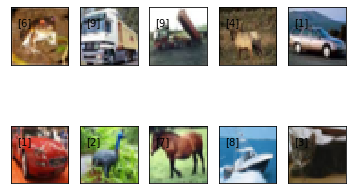

In [4]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1])
    plt.text(3,10,str(y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

**Datasets**

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [8]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((50000, 32, 32, 3), (50000, 10)), ((10000, 32, 32, 3), (10000, 10)))

**Model**

In [11]:
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dense,
                                     Flatten, Dropout)

In [12]:
# Hyperparameters

BATCH_SIZE = 128
EPOCHS = 2000
LEARNING_RATE = 1e-3

LeNet5

In [13]:
def lenet5():
    """
    LeNet5
    """
    inputs = keras.Input(shape=(32, 32, 3))

    # layer_1 convolution, pooling
    conv_1 = Conv2D(filters=6, kernel_size=(5, 5), activation='relu')(inputs)
    pooling_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)

    # layer_2 convolution, pooling
    conv_2 = Conv2D(filters=16, kernel_size=(5, 5), activation='relu')(pooling_1)
    pooling_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)

    # layer_3 full connection
    flatten = Flatten()(pooling_2)
    dense_3 = Dense(units=120, activation='relu')(flatten)

    # layer_4 full connection
    dense_4 = Dense(units=84, activation='relu')(dense_3)

    # layer_5 output
    outputs = Dense(units=10, activation='softmax')(dense_4)

    return keras.Model(inputs=inputs, outputs=outputs)

In [14]:
img_clf_lenet5 = lenet5()

In [15]:
img_clf_lenet5.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120 

In [16]:
from tensorflow.keras.layers import BatchNormalization

In [17]:
def lenet5_with_bn():
    """
    LeNet5
    """
    inputs = keras.Input(shape=(32, 32, 3))

    # layer_1 convolution, pooling
    conv_1 = Conv2D(filters=6, kernel_size=(5, 5), activation='relu')(inputs)
    pooling_1 = MaxPooling2D(pool_size=(2, 2))(BatchNormalization()(conv_1))

    # layer_2 convolution, pooling
    conv_2 = Conv2D(filters=16, kernel_size=(5, 5), activation='relu')(pooling_1)
    pooling_2 = MaxPooling2D(pool_size=(2, 2))(BatchNormalization()(conv_2))

    # layer_3 full connection
    flatten = Flatten()(pooling_2)
    dense_3 = Dense(units=120, activation='relu')(flatten)

    # layer_4 full connection
    dense_4 = Dense(units=84, activation='relu')(BatchNormalization()(dense_3))

    # layer_5 output
    outputs = Dense(units=10, activation='softmax')(BatchNormalization()(dense_4))

    return keras.Model(inputs=inputs, outputs=outputs)

In [18]:
lenet5_clf_with_bn_model = lenet5_with_bn()

In [19]:
lenet5_clf_with_bn_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
batch_normalization_v2 (Batc (None, 28, 28, 6)         24        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 10, 10, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0   

模型可视化

In [22]:
# For Linux 
#sudo apt-get install graphviz

In [21]:
# !pip3 install pydot==1.2.3
# !pip3 install graphviz==0.8.1

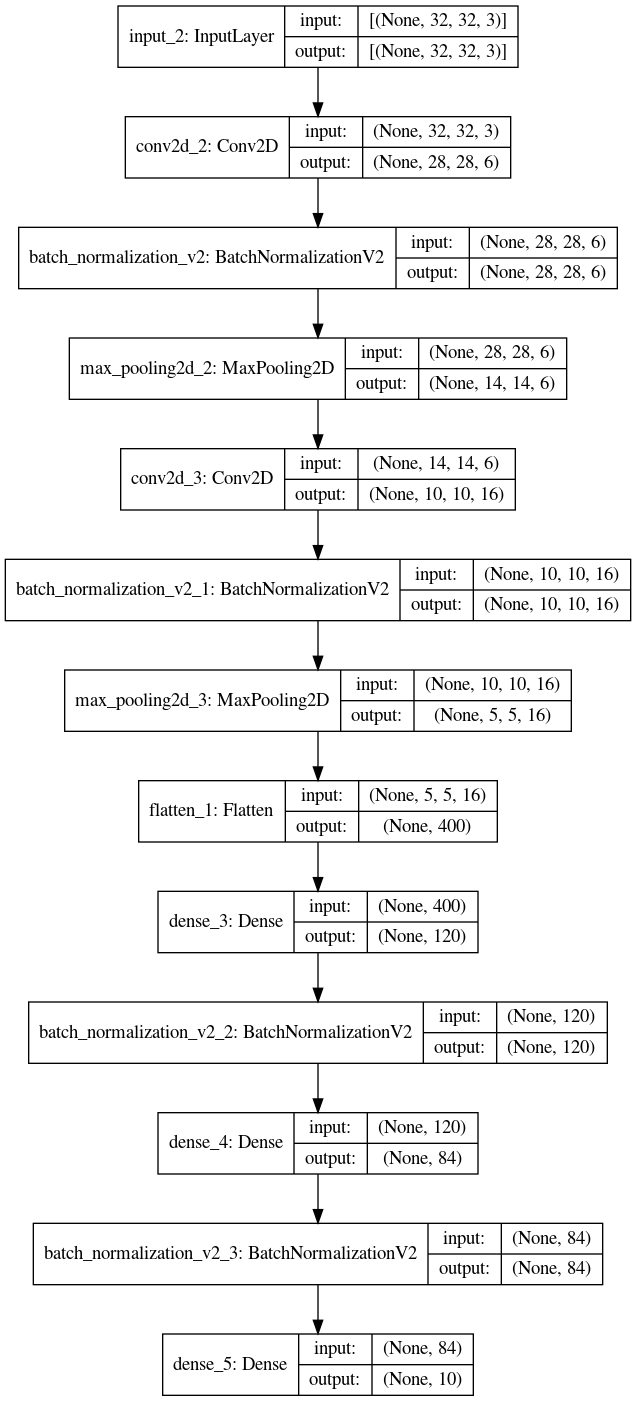

In [23]:
from tensorflow.keras.utils import plot_model

plot_model(lenet5_clf_with_bn_model, to_file='lenet5_bn_model.png', show_shapes=True)

**Train**

In [24]:
import pylab as pl
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras.callbacks import Callback

In [2]:
img_clf_lenet5_bn = lenet5_with_bn()

img_clf_lenet5_bn.compile(optimizer=optimizers.SGD(learning_rate=LEARNING_RATE),
                          loss=losses.categorical_crossentropy,
                          metrics=['accuracy'])

# train_history = img_clf_lenet5_bn.fit(x_train, y_train, batch_size=BATCH_SIZE, 
#                                       epochs=EPOCHS, workers=4,
#                                       validation_split=0.25)
# img_clf_lenet5_bn.save('lenet5_bn.model')

NameError: name 'lenet5_with_bn' is not defined

可视化

In [26]:
import json

In [27]:
class FloatEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, (np.float, np.float32, np.float64)):
            return float(o)
        return super(FloatEncoder, self).default(o)

In [28]:
def serialize(obj, filepath):
    with open(filepath, 'w+') as f:
        json.dump(obj, f, cls=FloatEncoder)

In [29]:
def deserialize(filepath):
    with open(filepath) as f:
        return json.load(f)

In [31]:
# record train history data

LENET5_BN_TRAIN_HISTORY_FILEPAHT = 'lenet5_bn_train_history.json'

# serialize(train_history.history, LENET5_BN_TRAIN_HISTORY_FILEPAHT)
# assert isinstance(deserialize(LENET5_BN_TRAIN_HISTORY_FILEPAHT), dict)

In [74]:
plt.legend?

In [81]:
def train_virtualize(history, name='Model'):
    """
    Train virtualization
    """
    # Accuracy
    _, ax = plt.subplots(1, 2, figsize=(12, 4))
    acc = 'acc' if 'acc' in history else 'accuracy'
    val_acc = 'val_acc' if 'val_acc' in history else 'val_accuracy'
    ax[0].plot(history[acc])
    ax[0].plot(history[val_acc])
    ax[0].set_title('{} Accuracy'.format(name))
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Test'], loc='upper right')

    # Loss
    ax[1].plot(history['loss'])
    ax[1].plot(history['val_loss'])
    ax[1].set_title('{} Loss'.format(name))
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='upper right')

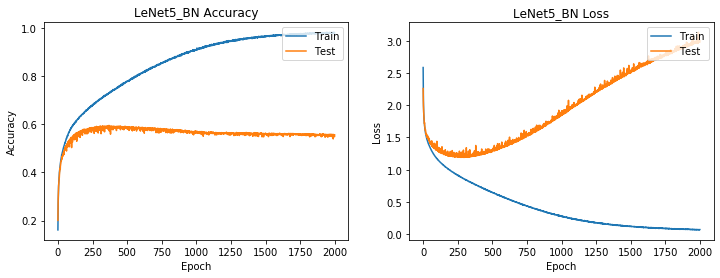

In [82]:
history = deserialize(LENET5_BN_TRAIN_HISTORY_FILEPAHT)
train_virtualize(history, name='LeNet5_BN')

模型过拟合，降低模型复杂度

In [34]:
def img_clf_model():
    inputs = keras.Input(shape=(32, 32, 3))

    # layer_1 convolution, pooling
    conv_1 = Conv2D(filters=6, kernel_size=(3, 3), activation='relu')(inputs)
    pooling_1 = MaxPooling2D(pool_size=(2, 2))(BatchNormalization()(conv_1))

    # layer_2 convolution, pooling
    conv_2 = Conv2D(filters=5, kernel_size=(3, 3), activation='relu')(pooling_1)
    pooling_2 = MaxPooling2D(pool_size=(2, 2))(BatchNormalization()(conv_2))

    # layer_3 full connection
    flatten = Flatten()(pooling_2)
    dense_3 = Dense(units=64, activation='relu')(flatten)

    # layer_4 full connection
    dense_4 = Dense(units=32, activation='relu')(BatchNormalization()(dense_3))

    # layer_5 output
    outputs = Dense(units=10, activation='softmax')(BatchNormalization()(dense_4))

    return keras.Model(inputs=inputs, outputs=outputs)


In [35]:
img_clf_model = img_clf_model()
img_clf_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 6)         168       
_________________________________________________________________
batch_normalization_v2_4 (Ba (None, 30, 30, 6)         24        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 5)         275       
_________________________________________________________________
batch_normalization_v2_5 (Ba (None, 13, 13, 5)         20        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 5)           0   

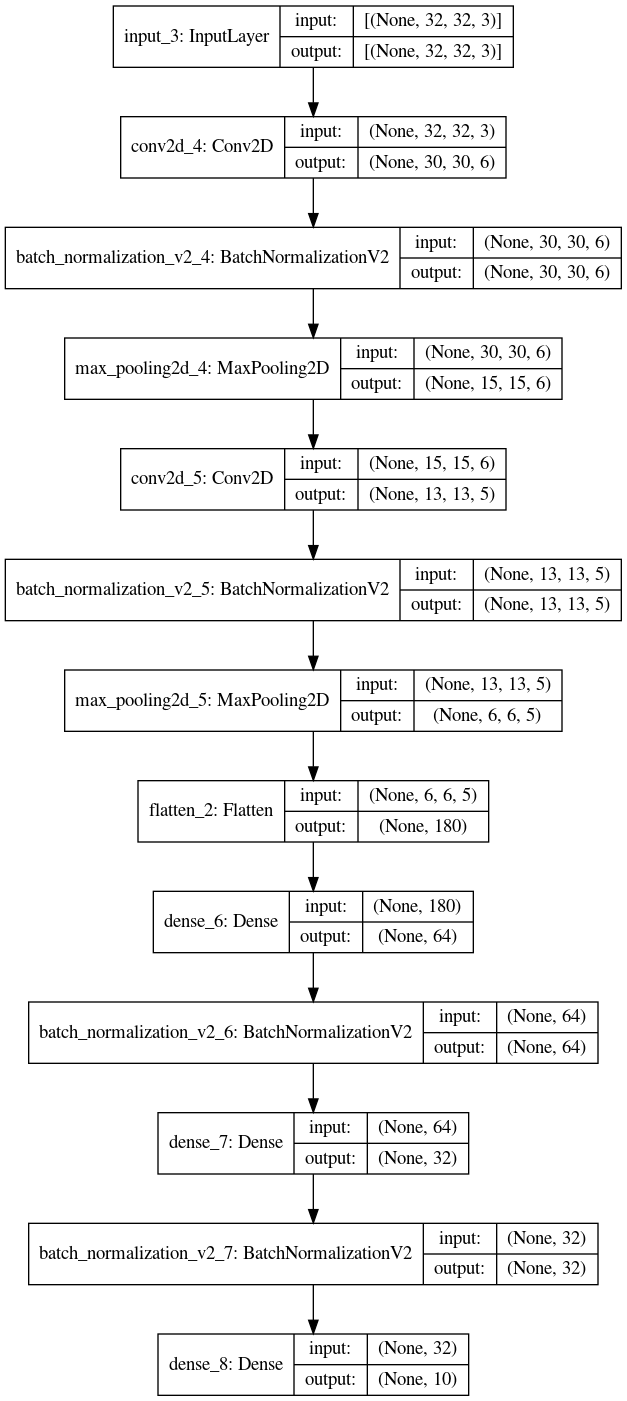

In [37]:
plot_model(img_clf_model, to_file='img_clf_model.png', show_shapes=True)

Train

In [99]:
img_clf_model.compile(optimizer=optimizers.Adagrad(learning_rate=0.01), loss=losses.categorical_crossentropy,
                     metrics=['accuracy'])
# img_clf_train_history = img_clf_model.fit(x_train, y_train, batch_size=512, epochs=400,
#                                           validation_split=0.25, workers=8, use_multiprocessing=True)


In [100]:
# img_clf_model.save('img_cls.model')

In [101]:
IMG_CLF_TRAIN_HISOTRY_FILEPATH = 'img_cls_train_history.json'
# serialize(img_clf_train_history.history, IMG_CLF_TRAIN_HISOTRY_FILEPATH)

In [102]:
deserialize(IMG_CLF_TRAIN_HISOTRY_FILEPATH).keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

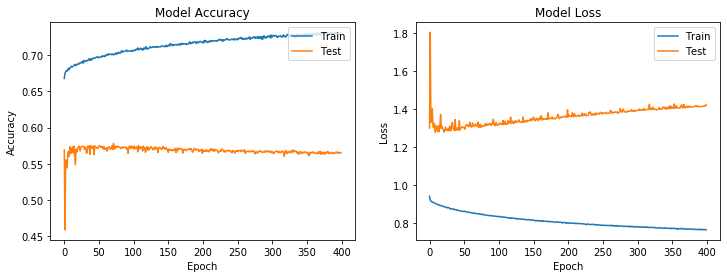

In [103]:
train_virtualize(deserialize(IMG_CLF_TRAIN_HISOTRY_FILEPATH))

继续优化

增加模型复杂度，添加L2范数，Dropout

TODO

**Evaluation**

In [97]:
from tensorflow.keras.models import load_model

model = load_model('img_cls.model')

model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 127us/sample - loss: 1.3998 - accuracy: 0.5669


[1.399793681716919, 0.5669]

## Optional 

TODO

##### Do you want to build a CNN from scratch ? 

In this optianl part, you will build a cnn network step by step.

In [ ]:
import numpy as np
np.random.seed(1)

##### 4.1 Implement a convolution step

Hints: Numpy.sum function might be useful.

In [ ]:
def conv_single_step(a_prev_slice,W,b):
    '''
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    Arguments:
    a_prev_slice: slice of input data (shape=(f,f,n_C_prev))
    W: Weight parameters contained in a window. (shape = (f,f,n_C_prev))
    b: Bias parameters contained in a window. (shape=(1,1,1))
    
    Reutrns:
    
    Z: a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data 
    '''
    # Element-wise product
    s = None
    
    # Sum over s  
    Z = None
    
    # Add bias b to z.
    Z = None
    
    return Z

In [ ]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Use the code above to test your code. If your c
ode is correct, you should be able to get the output shown as below.

<table>
    <tr>
        <td>
            Z
        </td>
        <td>
            -6.99908945068
        </td>
    </tr>

</table>

##### 4.2 Padding

Hints: Numpy.pad function might be useful.

In [ ]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X: python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad: integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad: padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """

    X_pad = None
    
    return X_pad

In [ ]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
```

##### 4.3 Implement a forward propagation in CNN.

Hints: The formulas to calculate the output shapes are :

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

In [ ]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev: output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W: Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b: Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters: python dictionary containing "stride" and "pad"
        
    Returns:
    Z: conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache: cache of values needed for the conv_backward() function
    """
    
    # Get dimensions from A_prev's shape  
    (m, n_H_prev, n_W_prev, n_C_prev) = None
    
    # Get dimensions from W's shape 
    (f, f, n_C_prev, n_C) = None
    
    # Get information from "hparameters" 
    stride = None
    pad = None
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. 
    n_H = None
    n_W = None
    
    # Initialize the output volume Z with zeros. 
    Z = None
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = None
    
    for i in range(None):               # loop over the batch of training examples
        a_prev_pad = None               # Select ith training example's padded activation
        for h in range(None):           # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" 
            vert_start = None
            vert_end = None
            
            for w in range(None):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice"
                horiz_start = None
                horiz_end = None
                
                for c in range(None):   # loop over channels (= #filters) of the output volume
                                        
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). 
                    a_slice_prev = None
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. 
                    weights = None
                    biases = None
                    Z[i, h, w, c] = None
                                        
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
Z's mean =
 0.692360880758
Z[3,2,1] =
 [ -1.28912231   2.27650251   6.61941931   0.95527176   8.25132576
   2.31329639  13.00689405   2.34576051]
cache_conv[0][1][2][3] = [-1.1191154   1.9560789  -0.3264995  -1.34267579]
```

##### 4.4 Pooling layers

Hints: As there\'s no padding, the formulas binding the output shape of the pooling to the input shape is:

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$

$$ n_C = n_{C_{prev}}$$

In [ ]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev: Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters: python dictionary containing "f" and "stride"
    mode: the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A: output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache: cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Get dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(None):                         # loop over the training examples
        for h in range(None):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = None
            vert_end = None
            
            for w in range(None):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                horiz_start = None
                horiz_end = None
                
                for c in range (None):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = None
                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                    if mode == "max":
                        A[i, h, w, c] = None
                    elif mode == "average":
                        A[i, h, w, c] = None
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[ 1.74481176  0.90159072  1.65980218]
   [ 1.74481176  1.46210794  1.65980218]
   [ 1.74481176  1.6924546   1.65980218]]

  [[ 1.14472371  0.90159072  2.10025514]
   [ 1.14472371  0.90159072  1.65980218]
   [ 1.14472371  1.6924546   1.65980218]]

  [[ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.6924546   2.18557541]]]


 [[[ 1.19891788  0.84616065  0.82797464]
   [ 0.69803203  0.84616065  1.2245077 ]
   [ 0.69803203  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.84616065  1.27375593]
   [ 1.96710175  0.84616065  1.23616403]
   [ 1.62765075  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.86888616  1.27375593]
   [ 1.96710175  0.86888616  1.23616403]
   [ 1.62765075  1.12141771  0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[ -3.01046719e-02  -3.24021315e-03  -3.36298859e-01]
   [  1.43310483e-01   1.93146751e-01  -4.44905196e-01]
   [  1.28934436e-01   2.22428468e-01   1.25067597e-01]]

  [[ -3.81801899e-01   1.59993515e-02   1.70562706e-01]
   [  4.73707165e-02   2.59244658e-02   9.20338402e-02]
   [  3.97048605e-02   1.57189094e-01   3.45302489e-01]]

  [[ -3.82680519e-01   2.32579951e-01   6.25997903e-01]
   [ -2.47157416e-01  -3.48524998e-04   3.50539717e-01]
   [ -9.52551510e-02   2.68511000e-01   4.66056368e-01]]]


 [[[ -1.73134159e-01   3.23771981e-01  -3.43175716e-01]
   [  3.80634669e-02   7.26706274e-02  -2.30268958e-01]
   [  2.03009393e-02   1.41414785e-01  -1.23158476e-02]]

  [[  4.44976963e-01  -2.61694592e-03  -3.10403073e-01]
   [  5.08114737e-01  -2.34937338e-01  -2.39611830e-01]
   [  1.18726772e-01   1.72552294e-01  -2.21121966e-01]]

  [[  4.29449255e-01   8.44699612e-02  -2.72909051e-01]
   [  6.76351685e-01  -1.20138225e-01  -2.44076712e-01]
   [  1.50774518e-01   2.89111751e-01   1.23238536e-03]]]]
```

####  Congratulations! You hanve finished the assignment 6.  You now understand how convolutional neural networks work.